Iteration 200 Best 15.9396671325 Mean 16.0203130243 Median 15.9396671325 Worst 19.9719617213
Iteration 400 Best 9.79489122965 Mean 10.0890806199 Median 10.0217305307 Worst 12.796700638
Iteration 600 Best 2.63462225423 Mean 2.65249344189 Median 2.63462225423 Worst 3.52818163698
Iteration 800 Best 0.112469265062 Mean 0.135351560902 Median 0.112469265062 Worst 0.389957056366
Iteration 1000 Best 0.000375639378053 Mean 0.000375645809572 Median 0.000375645746751 Worst 0.000375653560273
[ -5.49209014e-05   9.86558154e-05  -1.90498030e-04   5.88519295e-05
   8.03787480e-05  -3.96525143e-06   1.13224638e-04   1.20414719e-04
  -1.92500649e-05  -2.55374378e-05]


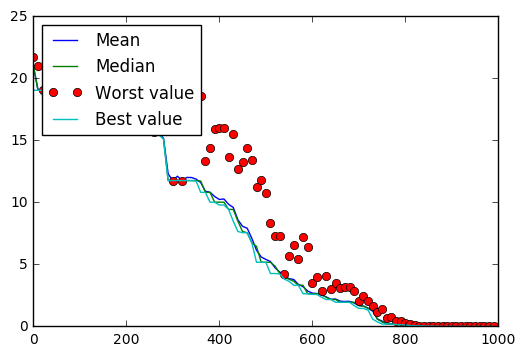

In [6]:
from __future__ import division
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
import evolutionary.genetic_algorithms.initializations as initialization
import evolutionary.genetic_algorithms.selections as selection
import evolutionary.genetic_algorithms.mutations as mutation
import evolutionary.genetic_algorithms.crossovers as crossover
import evolutionary.genetic_algorithms.replacements as replacement


import evolutionary.optim_functions as functions
from evolutionary import Population

np.random.seed(82634)

# Define the problem to solvea and get its fitness function
problem = functions.Ackley()
fitness_function = problem.evaluate

# Initalize vars
n_dimensions = 10
n_population = 50
n_iterations = 1000
xover_prob = 1
mutat_prob = 0.8

# Define the bounds to explore the problem
upper = np.ones((n_population, n_dimensions))*problem.upper
lower = np.ones((n_population, n_dimensions))*problem.lower

# Log results var
mean = np.array([])
median = np.array([])
worst = np.array([])
best = np.array([])
best_individual = np.array([])

# Create the class Population and initialize its chromosomes
population = Population(chromosomes=initialization.uniform(n_population, lower, upper, n_dimensions))

# Iterate simulating the evolutionary process
for i in range(n_iterations):
    # Apply the function in each row to get the array of fitness
    fitness = fitness_function(population.chromosomes)
    
    # Log the values
    mean = np.append(mean, np.mean(fitness))
    median = np.append(median, np.median(fitness))
    worst = np.append(worst, np.max(fitness))
    best = np.append(best, np.min(fitness))
    
    # Update the best chromosome
    if i>0 and best[i-1] > best[i]:
        best_individual = population.chromosomes[np.argmax(fitness)]
    
    # Print the iteration result
    if (i+1)%200 == 0:
        print "Iteration", i+1, "Best", best[i], "Mean", mean[i], "Median", median[i], "Worst", worst[i]
    
    # Select a subgroup of parents
    parents, idx = selection.wheel(population.chromosomes, fitness, N=3, M=1, iterations=10)
    
    # Use recombination to generate new children
    children = crossover.blend(parents, xover_prob, upper[idx], lower[idx])
    
    # Mutate the generated children
    children = mutation.non_uniform(children, mutat_prob, upper[idx], lower[idx], i, n_iterations)
    
    # Replace the current chromosomes of parents and childrens to create the new chromosomes
    population.chromosomes = replacement.elitist(population.chromosomes, fitness, children,
                                               fitness_function(children), n_population)

print best_individual
if i > 0:
    x = np.arange(0, n_iterations, 20)
    plt.plot(x, mean[::20])
#     plt.plot(x, median[::10])
    plt.plot(x, worst[::20], 'o')
    plt.plot(x, best[::20])
    plt.legend(['Mean', 'Worst value', 'Best value'], loc='upper right')

    plt.show()

[ 0.23076923  0.38461538  0.07692308  0.30769231  0.        ]
[ 0.38461538  0.30769231  0.          0.07692308  0.23076923]
[ 0.          0.38461538  0.30769231  0.07692308  0.23076923]
[ 0.38461538  0.23076923  0.          0.30769231  0.07692308]
[ 0.30769231  0.38461538  0.07692308  0.          0.23076923]
[ 0.07692308  0.38461538  0.          0.23076923  0.30769231]
[ 0.07692308  0.30769231  0.          0.23076923  0.38461538]
[ 0.          0.38461538  0.30769231  0.23076923  0.07692308]
[ 0.23076923  0.30769231  0.          0.38461538  0.07692308]
[ 0.30769231  0.07692308  0.23076923  0.          0.38461538]
[ 0.38461538  0.07692308  0.23076923  0.30769231  0.        ]
[ 0.23076923  0.30769231  0.38461538  0.          0.07692308]
[ 0.          0.30769231  0.38461538  0.23076923  0.07692308]
[ 0.30769231  0.38461538  0.07692308  0.23076923  0.        ]
[ 0.30769231  0.38461538  0.          0.07692308  0.23076923]
[ 0.38461538  0.07692308  0.          0.23076923  0.30769231]
[ 0.2307

(array([  58.,    0.,    0.,  238.,    0.,    0.,  329.,    0.,    0.,  375.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

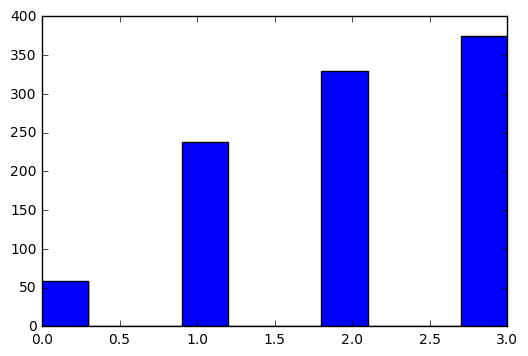

In [350]:
import evolutionary.genetic_algorithms.selections as selection
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
reload(selection)

parents = np.array([[1,2,3,4], [2,3,4,5], [3,2,1,5],[4,5,3,2],[5,3,1,2]])
fitness = np.array([5.,3.,2.,1.,6.])

# print (selection.tournament(parents,fitness,N=5,M=2,iterations=1))

a = np.array([])
for i in range(1000):
    a = np.append(a ,selection.wheel(parents,fitness,N=5,M=1, iterations=1)[1])

plt.hist(a)

In [18]:
from __future__ import division
import evolutionary.genetic_algorithms.crossovers as crossover
import numpy as np

parents = np.array([[1.,2.,3.,4.], [2.,3.,4.,5.], [3.,2.,1.,5.],[4.,5.,3.,2.],[5.,3.,1.,2.]])

print crossover.blend(parents, 1, 32, -32)
print crossover.blend(parents, 1, 32, -32)


[[ 4.40266778  6.20800333  3.80533555  0.79199667]
 [ 2.59733222  0.79199667  0.19466445  6.20800333]
 [ 6.89925079  3.4748127   0.0503746   1.0503746 ]
 [-0.89925079  1.5251873   3.9496254   4.9496254 ]]
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


In [1]:
import numpy as np
import evolutionary.genetic_algorithms.mutations as mutation
a = np.array([1.,4.,3.,2.,5.,6.,0.])
b= np.array([[1,2,3,4,5,6,7], [7,6,5,4,3,2,1]])
u = np.ones(a.shape)*6
l = np.ones(a.shape)*0

print mutation.non_uniform(a, 1, upper=u, lower=l, t=1, tmax=100)
print mutation.uniform(a,1, upper=u, lower=l)

np.random.uniform([1,6],[3,8],2)

[[ 0.70327834  1.85329865  2.71474666  3.87194133  4.42720462  4.73623776
   5.89259592]]
[[ 0.36633262  4.606763    4.2482052   0.74082065  4.61289602  5.04159376
   0.51315189]]


array([ 1.43957738,  7.34221818])

In [2]:
import numpy as np
parents=np.array([[-1,2,3], [2,5,1]])
upper = np.array([[4,4,4], [4,4,4]])
lower = np.array([[1,1,1], [1,1,1]])
out = parents>upper
a = np.zeros(parents.shape)

a[out]=10
print out, a

[[False False False]
 [False  True False]] [[  0.   0.   0.]
 [  0.  10.   0.]]
